# loan prediction 
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.


# Variable	        Description

1. Loan_ID:	        Unique Loan ID
2. Gender: 	        Male/ Female
3. Married:	        Applicant married (Y/N)
4. Dependents:	        Number of dependents
5. Education:	        Applicant Education (Graduate/ Under Graduate)
6. Self_Employed: 	    Self employed (Y/N)
7. ApplicantIncome:	Applicant income
8. CoapplicantIncome: 	Coapplicant income
9. LoanAmount:  	    Loan amount in thousands
10. Loan_Amount_Term:	Term of loan in months
11. Credit_History: 	credit history meets guidelines
12. Property_Area:  	Urban/ Semi Urban/ Rural
13. Loan_Status:    	Loan approved (Y/N)

### Steps involved

## Importing data and checking info

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r'C:\Users\HP\Desktop\KOMAL\DATA\from analytics vidya\Loan prediction\train.csv')


In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# dealing with missing values 

In [6]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###### replacing and coverting column type 

In [7]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
train['Dependents']=train['Dependents'].str.replace("+","")

train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])


train['Dependents']=train['Dependents'].astype(int)

In [9]:
# categorical variables

train['Gender']=train['Gender'].fillna(method="bfill")
train= train.fillna({'Married':'Yes',
                  'Self_Employed':'NO'})


<AxesSubplot:xlabel='LoanAmount'>

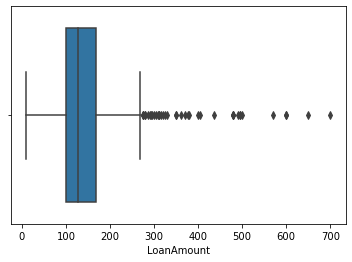

In [10]:
sns.boxplot(train.LoanAmount)

from boxplot wee can see that the data is skewed. There are several or large number of data points which act as outliers. Outliers data points will have significant impact on the mean and hence, in such cases, it is not recommended to use mean for replacing the missing values. Using mean value for replacing missing values may not create a great model and hence gets ruled out. For symmetric train distribution, one can use mean value for imputing missing values.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

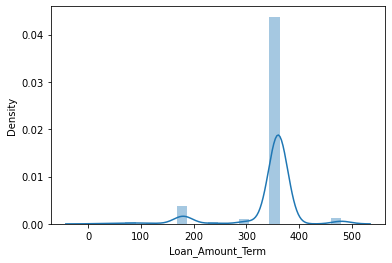

In [11]:
sns.distplot(train.Loan_Amount_Term)

The train looks to be left skewed (long tail in the left). 

In [12]:
# numerical variables
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mode()[0])
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History']=train['Credit_History'].fillna(method="ffill")


In [13]:
train['Dependents'].unique()

array([0, 1, 2, 3])

In [14]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
train.shape

(614, 13)

# Outlier detection and removal

In [17]:
train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.465798,342.410423,0.835505
std,1.009623,6109.041673,2926.248369,84.180967,64.428629,0.371027
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


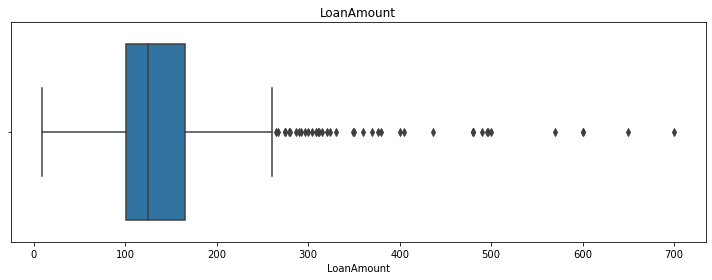

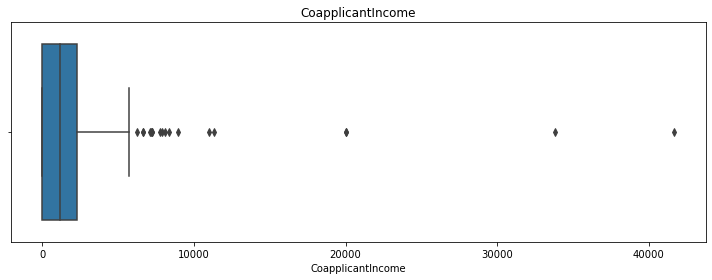

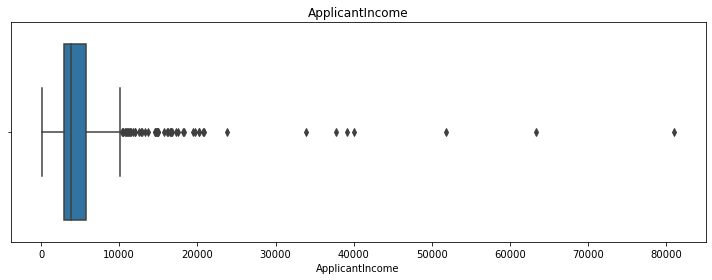

In [18]:
numerical_variables = ['LoanAmount', 'CoapplicantIncome','ApplicantIncome']
for i in numerical_variables:
    plt.figure(figsize=(10,4))
    sns.boxplot(train[i])
    plt.title(i)
    plt.tight_layout()

In [19]:
#detect outliers
Q1=train.LoanAmount.quantile(0.25)
Q3=train.LoanAmount.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [20]:
df=train[(train.LoanAmount<lower_limit)|(train.LoanAmount>upper_limit)]

In [21]:
df.shape

(41, 13)

######  hence we can see that there are so many outliers present in the data insted of removing we will replace outliers by percentiles

In [22]:
numerical_variables = ['LoanAmount', 'CoapplicantIncome','ApplicantIncome']
for i in numerical_variables:
    train[i]=np.where(train[i]>train[i].quantile(0.99),train[i].quantile(0.99),train[i])

<AxesSubplot:xlabel='CoapplicantIncome'>

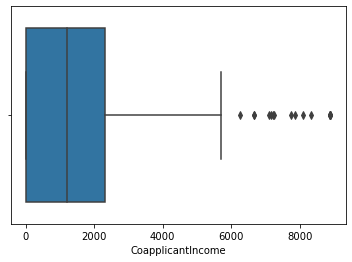

In [23]:
sns.boxplot(train.CoapplicantIncome)

<AxesSubplot:xlabel='ApplicantIncome'>

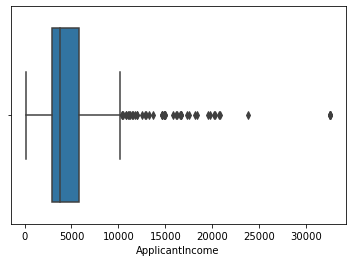

In [24]:
sns.boxplot(train.ApplicantIncome)

In [25]:
train.shape

(614, 13)

In [26]:
train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5209.602394,1483.654967,144.415456,342.410423,0.835505
std,1.009623,4533.747664,1831.226927,78.720659,64.428629,0.371027
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,32540.410000,8895.890000,495.870000,480.000000,1.000000


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int32(1), object(7)
memory usage: 60.1+ KB


### creation new variable

In [28]:
train['total_income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [29]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,120.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0


# Exploratory data analysis

categorical variables

<AxesSubplot:xlabel='Gender', ylabel='count'>

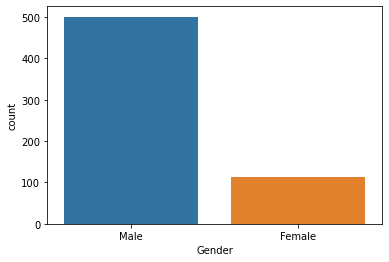

In [30]:
sns.countplot(train['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

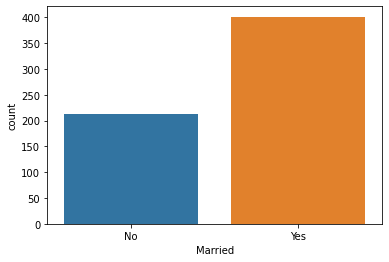

In [31]:
sns.countplot(train['Married'])

<AxesSubplot:xlabel='Education', ylabel='count'>

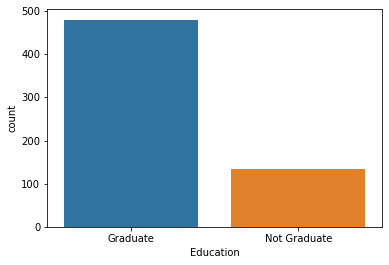

In [32]:
sns.countplot(train['Education'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

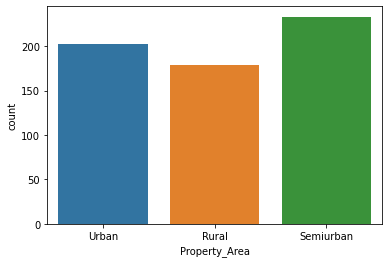

In [33]:
sns.countplot(train['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

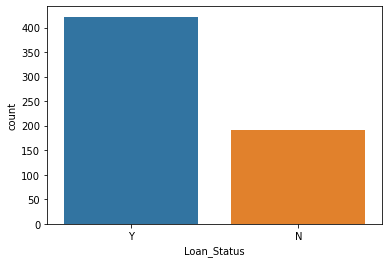

In [34]:
sns.countplot(train['Loan_Status'])

Numerical variables

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

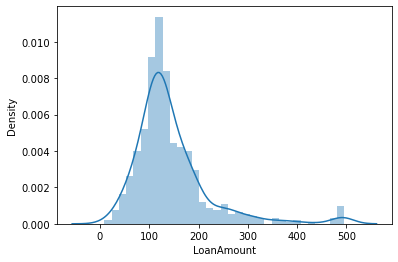

In [35]:
sns.distplot(train['LoanAmount'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

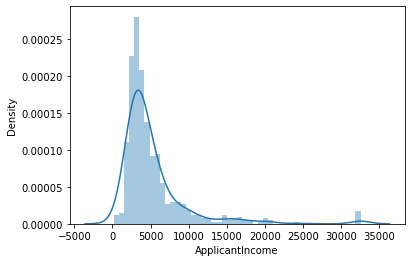

In [36]:
sns.distplot(train['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

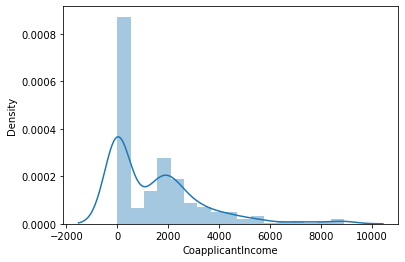

In [37]:
sns.distplot(train['CoapplicantIncome'])

we can see that distribution is left skewed not good for trainin model hence we can apply logtransformation. 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

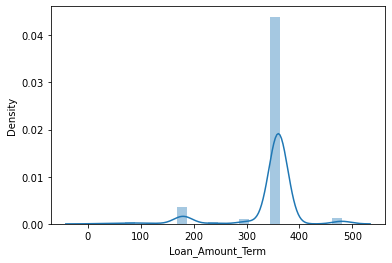

In [38]:
sns.distplot(train['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

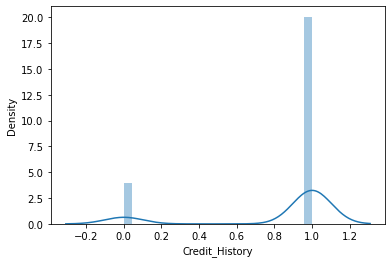

In [39]:
sns.distplot(train['Credit_History'])

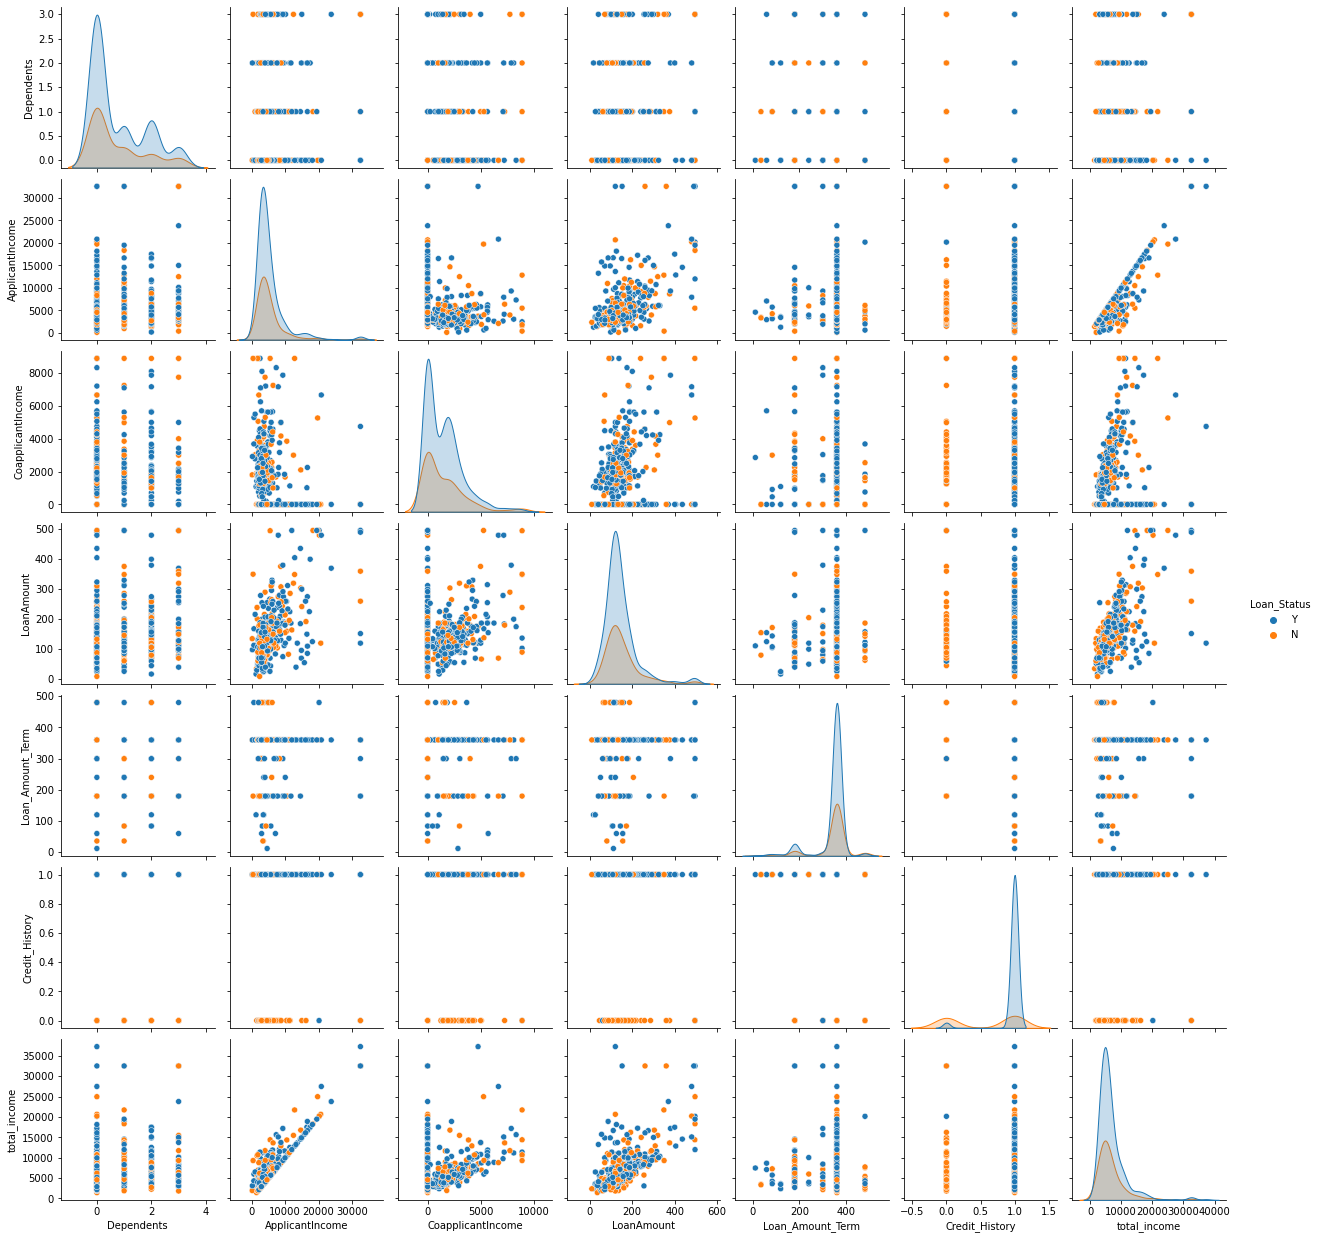

In [40]:
sns.pairplot(train, hue='Loan_Status')
plt.show()

<AxesSubplot:>

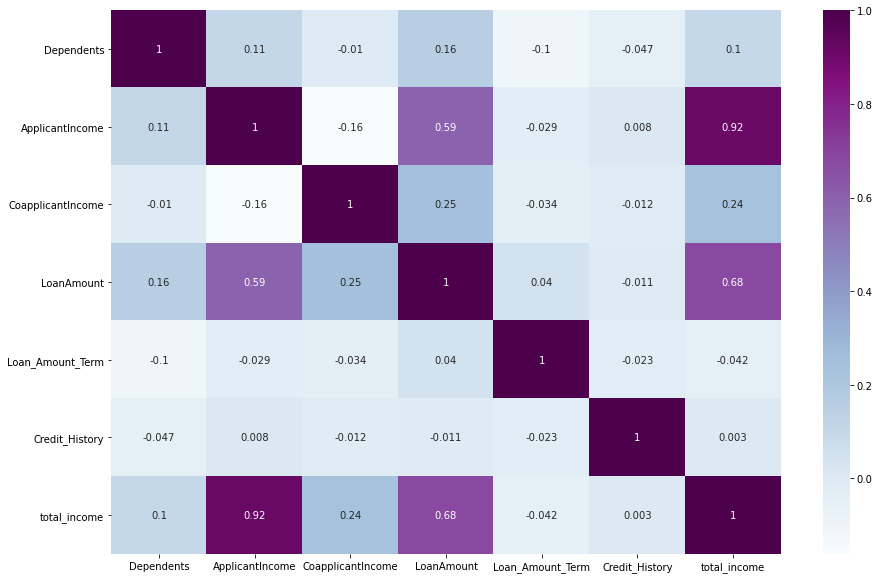

In [41]:
corr=train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot = True, cmap="BuPu")

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

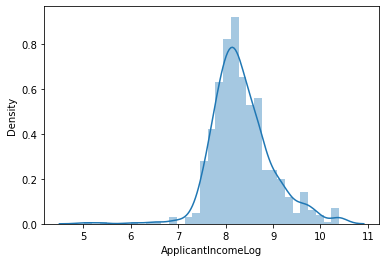

In [42]:
# applying logtransformation
train['ApplicantIncomeLog']=np.log(train['ApplicantIncome']+1)
sns.distplot(train['ApplicantIncomeLog'])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

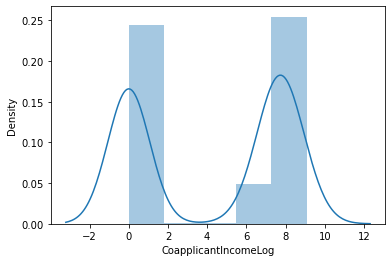

In [43]:
train['CoapplicantIncomeLog']=np.log(train['CoapplicantIncome']+1)
sns.distplot(train['CoapplicantIncomeLog'])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

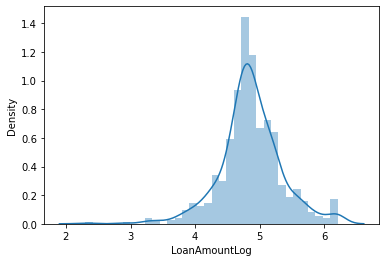

In [44]:
train['LoanAmountLog']=np.log(train['LoanAmount']+1)
sns.distplot(train['LoanAmountLog'])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

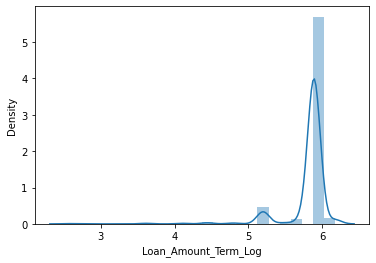

In [45]:
train['Loan_Amount_Term_Log']=np.log(train['Loan_Amount_Term']+1)
sns.distplot(train['Loan_Amount_Term_Log'])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

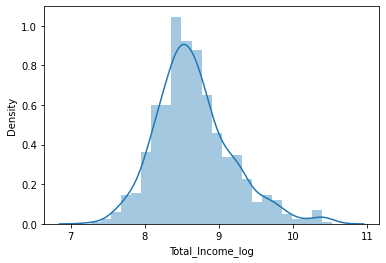

In [46]:
train['Total_Income_log']=np.log(train['total_income']+1)
sns.distplot(train['Total_Income_log'])

<AxesSubplot:>

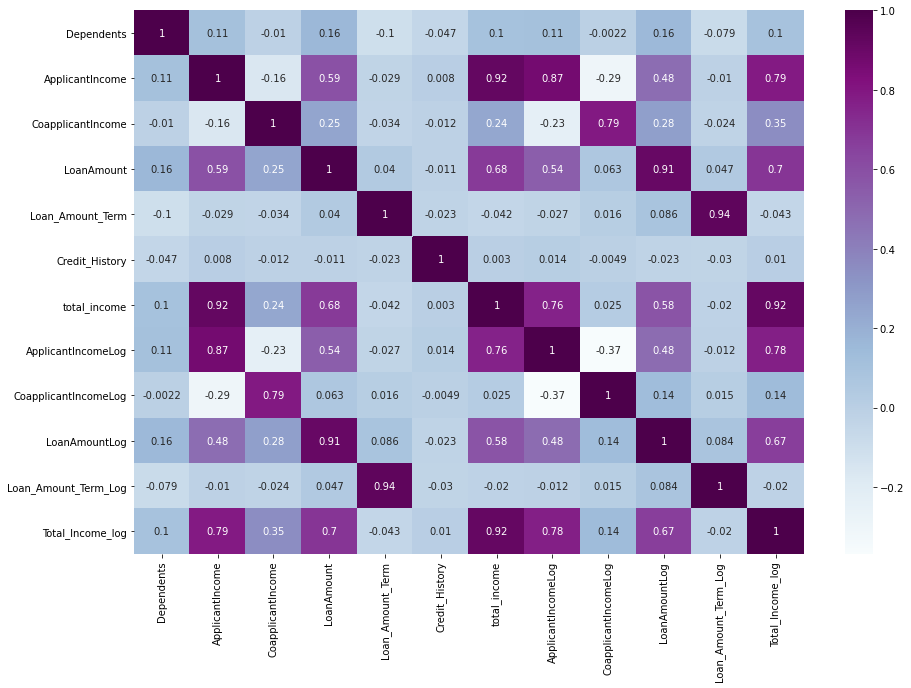

In [47]:
corr=train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot = True, cmap="BuPu")

# encoding categorical variables

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    object 
 2   Married               614 non-null    object 
 3   Dependents            614 non-null    int32  
 4   Education             614 non-null    object 
 5   Self_Employed         614 non-null    object 
 6   ApplicantIncome       614 non-null    float64
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            614 non-null    float64
 9   Loan_Amount_Term      614 non-null    float64
 10  Credit_History        614 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  total_income          614 non-null    float64
 14  ApplicantIncomeLog    614 non-null    float64
 15  CoapplicantIncomeLog  6

In [49]:
train['Property_Area'].unique()


array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [50]:
train['Self_Employed'].unique()


array(['No', 'Yes', 'NO'], dtype=object)

In [51]:
train['Self_Employed']=train['Self_Employed'].replace({"NO":"No"})

In [52]:
train = pd.get_dummies(train, columns=['Gender',
                                    'Married','Education','Self_Employed','Property_Area'
                                    ])





from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
train['Loan_Status']= label_encoder.fit_transform(train['Loan_Status']) 


In [53]:
train.Loan_Status

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               614 non-null    int32  
 2   ApplicantIncome          614 non-null    float64
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           614 non-null    float64
 7   Loan_Status              614 non-null    int32  
 8   total_income             614 non-null    float64
 9   ApplicantIncomeLog       614 non-null    float64
 10  CoapplicantIncomeLog     614 non-null    float64
 11  LoanAmountLog            614 non-null    float64
 12  Loan_Amount_Term_Log     614 non-null    float64
 13  Total_Income_log         614 non-null    float64
 14  Gender_Female            6

In [55]:
list(train.columns)

['Loan_ID',
 'Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status',
 'total_income',
 'ApplicantIncomeLog',
 'CoapplicantIncomeLog',
 'LoanAmountLog',
 'Loan_Amount_Term_Log',
 'Total_Income_log',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [56]:
cols=['Dependents',
 'ApplicantIncome',
  'Loan_Status',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban'   ]
train[cols]=train[cols].astype(float)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               614 non-null    float64
 2   ApplicantIncome          614 non-null    float64
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           614 non-null    float64
 7   Loan_Status              614 non-null    float64
 8   total_income             614 non-null    float64
 9   ApplicantIncomeLog       614 non-null    float64
 10  CoapplicantIncomeLog     614 non-null    float64
 11  LoanAmountLog            614 non-null    float64
 12  Loan_Amount_Term_Log     614 non-null    float64
 13  Total_Income_log         614 non-null    float64
 14  Gender_Female            6

In [58]:
train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,total_income,ApplicantIncomeLog,CoapplicantIncomeLog,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5209.602394,1483.654967,144.415456,342.410423,0.835505,0.687296,6693.257362,8.337242,4.282054,...,0.815961,0.346906,0.653094,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990
std,1.009623,4533.747664,1831.226927,78.720659,64.428629,0.371027,0.463973,4607.530747,0.629239,3.864650,...,0.387832,0.476373,0.476373,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000,5.017280,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,4166.000000,7.965024,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,5416.500000,8.246303,7.081125,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,7521.750000,8.664922,7.739897,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,32540.410000,8895.890000,495.870000,480.000000,1.000000,1.000000,37290.410000,10.390269,9.093457,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## creating x & y variables And spliting the data 

In [59]:
y=train['Loan_Status']

x=train.drop(['Loan_Status','Loan_ID','ApplicantIncome','CoapplicantIncome',
 'LoanAmount','Loan_Amount_Term','total_income'],axis=1)

y,x

(0      1.0
 1      0.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 609    1.0
 610    1.0
 611    1.0
 612    1.0
 613    0.0
 Name: Loan_Status, Length: 614, dtype: float64,
      Dependents  Credit_History  ApplicantIncomeLog  CoapplicantIncomeLog  \
 0           0.0             1.0            8.674197              0.000000   
 1           1.0             1.0            8.430327              7.319202   
 2           0.0             1.0            8.006701              0.000000   
 3           0.0             1.0            7.857094              7.765993   
 4           0.0             1.0            8.699681              0.000000   
 ..          ...             ...                 ...                   ...   
 609         0.0             1.0            7.972811              0.000000   
 610         3.0             1.0            8.320448              0.000000   
 611         1.0             1.0            8.996280              5.484797   
 612         2.0             1.0       

#### Feature Selection

[0.05703954 0.25503632 0.13743619 0.07934704 0.13813109 0.05110262
 0.13601088 0.01540471 0.01276462 0.01071177 0.01119037 0.01188751
 0.01097565 0.01430051 0.01523173 0.01434946 0.01682415 0.01225584]


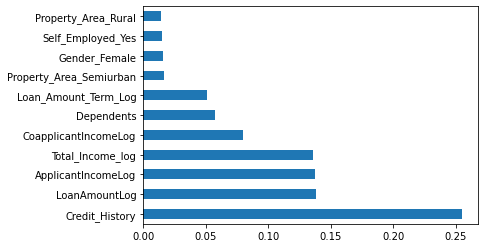

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

###### We can remove less important features from the data se

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [62]:
x_test.shape

(154, 18)

## Model Building
In this data Y that is target variable(loan status) is categorical variable Hence to solve this data and to predict further results we will use classification algorithms.

Used classification Algorithms:

1. Logistics
2. Random Forest classifier
3. XG Boost
4. KNN

###### 1. Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report

model_lr=LogisticRegression()
model_lr=model_lr.fit(x_train,y_train)
y_pred=model_lr.predict(x_test)
lr_probability =model_lr.predict_proba(x_test)[:,1]


acc_lr=accuracy_score(y_test,y_pred)
recall_lr=recall_score(y_test,y_pred)
precision_lr=precision_score(y_test,y_pred)
f1score_lr=f1_score(y_test,y_pred)
AUC_LR=roc_auc_score(y_pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.8441558441558441
ROC_AUC Score: 0.8586046511627907


######  ROC CURVE

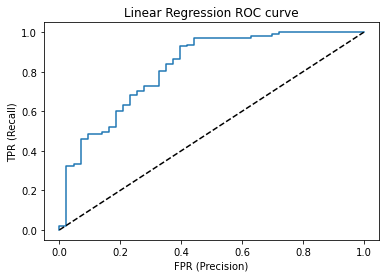

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()


##### 

###### Confusion Matrix

[[ 22  21]
 [  3 108]]


<AxesSubplot:>

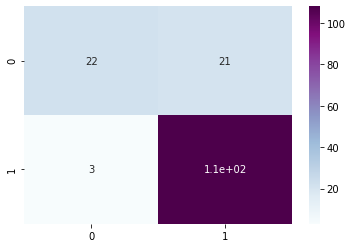

In [65]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

##### 2,Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier


model_rf=RandomForestClassifier()
model_rf=model_rf.fit(x_train,y_train)
y_pred=model_rf.predict(x_test)
RF_probability =model_rf.predict_proba(x_test)[:,1]


acc_rf=accuracy_score(y_test,y_pred)
recall_fr=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)
AUC_rf=roc_auc_score(y_pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_rf)

Accuracy :  0.7987012987012987
ROC_AUC Score: 0.7528248587570622


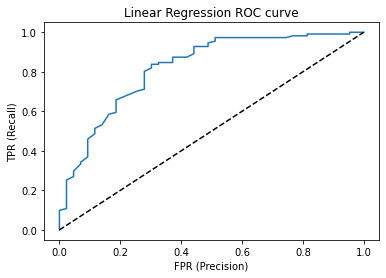

In [67]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[24 12]
 [19 99]]


<AxesSubplot:>

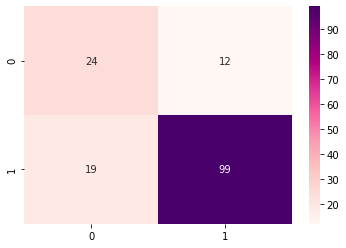

In [68]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

##### XG Boost 


In [69]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier()
model_xgb=model_xgb.fit(x_train,y_train)
y_pred=model_xgb.predict(x_test)
xgb_probability =model_xgb.predict_proba(x_test)[:,1]


acc_xgb=accuracy_score(y_test,y_pred)
recall_xgb=recall_score(y_test,y_pred)
precision_xgb=precision_score(y_test,y_pred)
f1score_xgb=f1_score(y_test,y_pred)
AUC_xgb=roc_auc_score(y_pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_xgb)

[17:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  0.8181818181818182
ROC_AUC Score: 0.7750917332182171


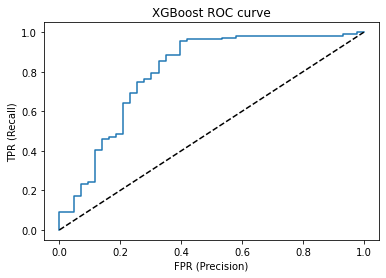

In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, xgb_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()


[[28 15]
 [13 98]]


<AxesSubplot:>

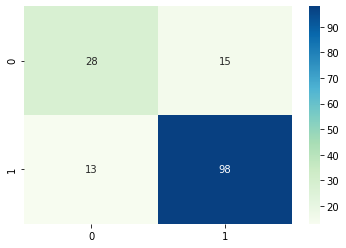

In [71]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')


##### 4.k_nearest_neighbors

In [72]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn=model_knn.fit(x_train,y_train)
y_pred=model_knn.predict(x_test)
knn_probability =model_knn.predict_proba(x_test)[:,1]


acc_knn=accuracy_score(y_test,y_pred)
recall_knn=recall_score(y_test,y_pred)
precision_knn=precision_score(y_test,y_pred)
f1score_knn=f1_score(y_test,y_pred)
AUC_knn=roc_auc_score(y_pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_knn)

Accuracy :  0.7402597402597403
ROC_AUC Score: 0.6691729323308269


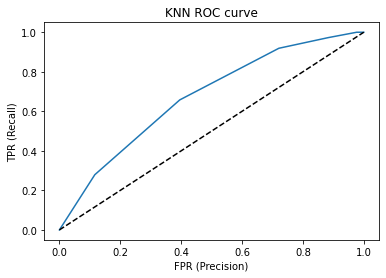

In [73]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, knn_probability)

plt.title('KNN ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()


[[ 12  31]
 [  9 102]]


<AxesSubplot:>

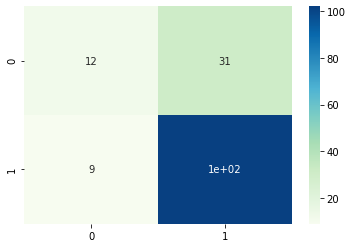

In [74]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')


## Comparing models

In [75]:
ind=['Logistic regression','Randomforest','XGBClassifier','K_nearest_neighbors']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb,acc_knn],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb,f1score_knn],
    "ROC_AUC":[AUC_LR,AUC_rf,AUC_xgb,AUC_knn]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,f1_score,ROC_AUC
Logistic regression,0.844156,0.900000,0.858605
Randomforest,0.798701,0.864629,0.752825
XGBClassifier,0.818182,0.875000,0.775092
K_nearest_neighbors,0.740260,0.836066,0.669173


From above results we can see that Logistics Regression perfom better as compare to other 3 models. heance we proceed with logistics regression

### test data set

In [76]:
test=pd.read_csv(r'C:\Users\HP\Desktop\KOMAL\DATA\from analytics vidya\Loan prediction\test.csv')


In [77]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [78]:
test.shape

(367, 12)

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [80]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [81]:
test['Dependents']=test['Dependents'].str.replace("+","")

test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])


test['Dependents']=test['Dependents'].astype(int)

In [82]:
#missing values
test['Gender']=test['Gender'].fillna(method="bfill")
test['Credit_History']=test['Credit_History'].fillna(method="ffill")


test= test.fillna({'Married':'Yes',
                  'Self_Employed':'NO'})


test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mode()[0])
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])


In [83]:
#outliers 
#replacing outliers by percentile
test['LoanAmount']=np.where(test['LoanAmount']>test['LoanAmount'].quantile(0.99),test['LoanAmount'].quantile(0.99),test['LoanAmount'])


In [84]:
test['total_income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [85]:
test['ApplicantIncomeLog']=np.log(test['ApplicantIncome']+1)
test['CoapplicantIncomelog']=np.log(test['CoapplicantIncome']+1)
test['LoanAmountlog']=np.log(test['LoanAmount']+1)
test['Loan_Amount_Term_log']=np.log(test['Loan_Amount_Term']+1)
test['Total_Income_log']=np.log(test['total_income']+1)


In [86]:
test['Self_Employed']=test['Self_Employed'].replace({"NO":"No"})

In [87]:
#encoding data
test = pd.get_dummies(test, columns=['Gender',
                                    'Married','Education','Self_Employed','Property_Area'
                                    ])







In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  367 non-null    object 
 1   Dependents               367 non-null    int32  
 2   ApplicantIncome          367 non-null    int64  
 3   CoapplicantIncome        367 non-null    int64  
 4   LoanAmount               367 non-null    float64
 5   Loan_Amount_Term         367 non-null    float64
 6   Credit_History           367 non-null    float64
 7   total_income             367 non-null    int64  
 8   ApplicantIncomeLog       367 non-null    float64
 9   CoapplicantIncomelog     367 non-null    float64
 10  LoanAmountlog            367 non-null    float64
 11  Loan_Amount_Term_log     367 non-null    float64
 12  Total_Income_log         367 non-null    float64
 13  Gender_Female            367 non-null    uint8  
 14  Gender_Male              3

In [89]:
cols=['Dependents',
 'ApplicantIncome',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban'   ]
test[cols]=test[cols].astype(float)

In [90]:
test.shape

(367, 24)

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  367 non-null    object 
 1   Dependents               367 non-null    float64
 2   ApplicantIncome          367 non-null    float64
 3   CoapplicantIncome        367 non-null    int64  
 4   LoanAmount               367 non-null    float64
 5   Loan_Amount_Term         367 non-null    float64
 6   Credit_History           367 non-null    float64
 7   total_income             367 non-null    int64  
 8   ApplicantIncomeLog       367 non-null    float64
 9   CoapplicantIncomelog     367 non-null    float64
 10  LoanAmountlog            367 non-null    float64
 11  Loan_Amount_Term_log     367 non-null    float64
 12  Total_Income_log         367 non-null    float64
 13  Gender_Female            367 non-null    float64
 14  Gender_Male              3

In [92]:
x_test=test.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome',
 'LoanAmount','Loan_Amount_Term','total_income'],axis=1)

In [93]:
x_test

,Dependents,Credit_History,ApplicantIncomeLog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,8.651899,0.000000,4.709530,5.888878,8.651899,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,8.031710,7.313887,4.844187,5.888878,8.428799,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,1.0,8.517393,7.496097,5.342334,5.888878,8.824825,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,1.0,7.758333,7.842671,4.615121,5.888878,8.494334,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,8.094684,0.000000,4.369448,5.888878,8.094684,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3.0,1.0,8.296547,7.483244,4.736198,5.888878,8.663369,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
363,0.0,1.0,8.333030,6.565265,4.753590,5.888878,8.490438,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
364,0.0,1.0,8.086718,7.597898,4.844187,5.888878,8.564840,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
365,0.0,1.0,8.517393,7.780721,5.068904,5.888878,8.908424,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [94]:
x_test.shape

(367, 18)

In [95]:
test_results=model_lr.predict(x_test)


In [118]:
df= pd.DataFrame({'ID': test.Loan_ID , 'Predicted class': test_results})


In [99]:
df.to_csv(r"C:\Users\HP\Desktop\KOMAL\output\loan_submission_file.csv",index=False)